In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

In [4]:
df = pd.read_csv("/Users/sarahSTACS/DSA4264-Detoxify/model-2/final_topic_df.csv")

In [ ]:
# Define the list of the 12 topics for which indices are to be calculated
topics_of_interest = [
    "Racism",
    "Religion",
    "Generational",
    "LGBTQ+",
    "Work",
    "COVID-19",
    "Gender",
    "Government",
    "Crimes",
    "Housing",
    "Transportation",
    "Education",
]

# Initialize DataFrame to store indices for toxic and hate classifications by year
all_indices_df = pd.DataFrame()

# Calculate indices for each specified topic for the years 2020 and 2023
for topic in topics_of_interest:
    # Filter data for each topic and year
    df_topic_2020 = df[(df["Final Topic Name"] == topic) & (df["year"] == 2020)]
    df_topic_2023 = df[(df["Final Topic Name"] == topic) & (df["year"] == 2023)]

    # Calculate the total hate and toxic counts for each topic and year
    total_hate_count_2020 = df_topic_2020[
        df_topic_2020["Classification"].str.startswith("Hate")
    ].shape[0]
    total_hate_count_2023 = df_topic_2023[
        df_topic_2023["Classification"].str.startswith("Hate")
    ].shape[0]

    total_toxic_count_2020 = df_topic_2020[
        df_topic_2020["Classification"].str.startswith("Toxic")
    ].shape[0]
    total_toxic_count_2023 = df_topic_2023[
        df_topic_2023["Classification"].str.startswith("Toxic")
    ].shape[0]

    # Collect indices for each topic and year
    indices_data = {"Final Topic Name": [topic]}

    if total_hate_count_2020 > 0:
        indices_data.update(
            {
                "Hate 1 Index 2020": df_topic_2020[
                    df_topic_2020["Classification"] == "Hate 1"
                ].shape[0]
                / total_hate_count_2020,
                "Hate 2 Index 2020": df_topic_2020[
                    df_topic_2020["Classification"] == "Hate 2"
                ].shape[0]
                / total_hate_count_2020,
                "Hate 3 Index 2020": df_topic_2020[
                    df_topic_2020["Classification"] == "Hate 3"
                ].shape[0]
                / total_hate_count_2020,
            }
        )

    if total_hate_count_2023 > 0:
        indices_data.update(
            {
                "Hate 1 Index 2023": df_topic_2023[
                    df_topic_2023["Classification"] == "Hate 1"
                ].shape[0]
                / total_hate_count_2023,
                "Hate 2 Index 2023": df_topic_2023[
                    df_topic_2023["Classification"] == "Hate 2"
                ].shape[0]
                / total_hate_count_2023,
                "Hate 3 Index 2023": df_topic_2023[
                    df_topic_2023["Classification"] == "Hate 3"
                ].shape[0]
                / total_hate_count_2023,
            }
        )

    if total_toxic_count_2020 > 0:
        indices_data.update(
            {
                "Toxic 1 Index 2020": df_topic_2020[
                    df_topic_2020["Classification"] == "Toxic 1"
                ].shape[0]
                / total_toxic_count_2020,
                "Toxic 2 Index 2020": df_topic_2020[
                    df_topic_2020["Classification"] == "Toxic 2"
                ].shape[0]
                / total_toxic_count_2020,
                "Toxic 3 Index 2020": df_topic_2020[
                    df_topic_2020["Classification"] == "Toxic 3"
                ].shape[0]
                / total_toxic_count_2020,
            }
        )

    if total_toxic_count_2023 > 0:
        indices_data.update(
            {
                "Toxic 1 Index 2023": df_topic_2023[
                    df_topic_2023["Classification"] == "Toxic 1"
                ].shape[0]
                / total_toxic_count_2023,
                "Toxic 2 Index 2023": df_topic_2023[
                    df_topic_2023["Classification"] == "Toxic 2"
                ].shape[0]
                / total_toxic_count_2023,
                "Toxic 3 Index 2023": df_topic_2023[
                    df_topic_2023["Classification"] == "Toxic 3"
                ].shape[0]
                / total_toxic_count_2023,
            }
        )

    # Append indices data for each topic
    indices_df = pd.DataFrame(indices_data)
    all_indices_df = pd.concat([all_indices_df, indices_df], ignore_index=True)

# Fill NaN with 0 for topics or years with missing values
all_indices_df.fillna(0, inplace=True)

# Display the final DataFrame with indices for each classification level and year
print(all_indices_df)

   Final Topic Name  Hate 1 Index 2020  Hate 2 Index 2020  Hate 3 Index 2020  \
0            Racism           0.968009           0.030888           0.001103   
1          Religion           0.983553           0.016447           0.000000   
2      Generational           0.959596           0.030303           0.010101   
3            LGBTQ+           0.931973           0.061224           0.006803   
4              Work           0.923077           0.051282           0.025641   
5          COVID-19           0.952756           0.047244           0.000000   
6            Gender           0.984127           0.015873           0.000000   
7        Government           0.954545           0.032468           0.012987   
8            Crimes           0.907216           0.056701           0.036082   
9           Housing           0.979592           0.020408           0.000000   
10   Transportation           0.954545           0.045455           0.000000   
11        Education           0.966667  

In [7]:
all_indices_df.to_csv("topic_index.csv", index=False)

In [ ]:
trend_data = []

# Loop through each topic to calculate the percentage change for Hate and Toxic indices
for topic in topics_of_interest:
    # Filter rows in all_indices_df to get the relevant indices for the topic
    topic_data = all_indices_df[all_indices_df["Final Topic Name"] == topic]

    if not topic_data.empty:
        try:
            # Extract Hate indices for 2020 and 2023 for each topic
            hate_1_index_2020 = topic_data["Hate 1 Index 2020"].values[0]
            hate_2_index_2020 = topic_data["Hate 2 Index 2020"].values[0]
            hate_3_index_2020 = topic_data["Hate 3 Index 2020"].values[0]

            hate_1_index_2023 = topic_data["Hate 1 Index 2023"].values[0]
            hate_2_index_2023 = topic_data["Hate 2 Index 2023"].values[0]
            hate_3_index_2023 = topic_data["Hate 3 Index 2023"].values[0]

            # Extract Toxic indices for 2020 and 2023 for each topic
            toxic_1_index_2020 = topic_data["Toxic 1 Index 2020"].values[0]
            toxic_2_index_2020 = topic_data["Toxic 2 Index 2020"].values[0]
            toxic_3_index_2020 = topic_data["Toxic 3 Index 2020"].values[0]

            toxic_1_index_2023 = topic_data["Toxic 1 Index 2023"].values[0]
            toxic_2_index_2023 = topic_data["Toxic 2 Index 2023"].values[0]
            toxic_3_index_2023 = topic_data["Toxic 3 Index 2023"].values[0]

            # Calculate proportion change from 2020 to 2023 for Hate indices
            hate_1_change = (
                ((hate_1_index_2023 - hate_1_index_2020) / hate_1_index_2020 * 100)
                if hate_1_index_2020
                else None
            )
            hate_2_change = (
                ((hate_2_index_2023 - hate_2_index_2020) / hate_2_index_2020 * 100)
                if hate_2_index_2020
                else None
            )
            hate_3_change = (
                ((hate_3_index_2023 - hate_3_index_2020) / hate_3_index_2020 * 100)
                if hate_3_index_2020
                else None
            )

            # Calculate proportion change from 2020 to 2023 for Toxic indices
            toxic_1_change = (
                ((toxic_1_index_2023 - toxic_1_index_2020) / toxic_1_index_2020 * 100)
                if toxic_1_index_2020
                else None
            )
            toxic_2_change = (
                ((toxic_2_index_2023 - toxic_2_index_2020) / toxic_2_index_2020 * 100)
                if toxic_2_index_2020
                else None
            )
            toxic_3_change = (
                ((toxic_3_index_2023 - toxic_3_index_2020) / toxic_3_index_2020 * 100)
                if toxic_3_index_2020
                else None
            )

            # Append trend data for the topic
            trend_data.append(
                {
                    "Final Topic Name": topic,
                    "Hate 1 % Change": hate_1_change,
                    "Hate 2 % Change": hate_2_change,
                    "Hate 3 % Change": hate_3_change,
                    "Toxic 1 % Change": toxic_1_change,
                    "Toxic 2 % Change": toxic_2_change,
                    "Toxic 3 % Change": toxic_3_change,
                }
            )
        except IndexError:
            print(f"Error processing data for topic: {topic}")

# Create DataFrame to display the trend data
trend_df = pd.DataFrame(trend_data)

# Display the trend DataFrame
print(trend_df)

   Final Topic Name  Hate 1 % Change  Hate 2 % Change  Hate 3 % Change  \
0            Racism        -1.454318        42.663996        81.572359   
1          Religion        -1.833699        67.724138              NaN   
2      Generational         0.617060        13.793103      -100.000000   
3            LGBTQ+        -0.954520        25.641026      -100.000000   
4              Work         5.753968       -76.785714       -53.571429   
5          COVID-19        -3.438017        69.333333              NaN   
6            Gender         0.031379        -1.945525              NaN   
7        Government        -0.784314         8.705882        35.882353   
8            Crimes        -5.996655        75.600157        31.972789   
9           Housing        -3.219697        27.272727              NaN   
10   Transportation        -8.590103       115.686275              NaN   
11        Education         0.360268       -10.447761              NaN   

    Toxic 1 % Change  Toxic 2 % Chang

In [ ]:
# Initialize a list to store the net trend data
net_trend_data = []

# Loop through each topic to calculate the net trend for Hate and Toxic indices
for topic in topics_of_interest:
    # Filter rows in trend_df to get the relevant percentage changes for the topic
    topic_trend_data = trend_df[trend_df["Final Topic Name"] == topic]

    # Check if the topic trend data contains values
    if not topic_trend_data.empty:
        try:
            # Extract percentage changes for Hate and Toxic indices
            hate_1_change = topic_trend_data["Hate 1 % Change"].values[0]
            hate_2_change = topic_trend_data["Hate 2 % Change"].values[0]
            hate_3_change = topic_trend_data["Hate 3 % Change"].values[0]

            toxic_1_change = topic_trend_data["Toxic 1 % Change"].values[0]
            toxic_2_change = topic_trend_data["Toxic 2 % Change"].values[0]
            toxic_3_change = topic_trend_data["Toxic 3 % Change"].values[0]

            # Calculate the net trend for Hate
            net_hate_trend = (
                (hate_3_change * 3) + (hate_2_change * 2) + (hate_1_change * 1)
            )

            # Calculate the net trend for Toxic
            net_toxic_trend = (
                (toxic_3_change * 3) + (toxic_2_change * 2) + (toxic_1_change * 1)
            )

            # Append net trend data for the topic
            net_trend_data.append(
                {
                    "Final Topic Name": topic,
                    "Net Hate Trend": net_hate_trend,
                    "Net Toxic Trend": net_toxic_trend,
                }
            )
        except IndexError:
            print(f"Error processing data for topic: {topic}")

net_trend_df = pd.DataFrame(net_trend_data)

# Merge the net trend DataFrame with the original trend_df
trend_df = pd.merge(trend_df, net_trend_df, on="Final Topic Name", how="left")

print(trend_df)

   Final Topic Name  Hate 1 % Change  Hate 2 % Change  Hate 3 % Change  \
0            Racism        -1.454318        42.663996        81.572359   
1          Religion        -1.833699        67.724138              NaN   
2      Generational         0.617060        13.793103      -100.000000   
3            LGBTQ+        -0.954520        25.641026      -100.000000   
4              Work         5.753968       -76.785714       -53.571429   
5          COVID-19        -3.438017        69.333333              NaN   
6            Gender         0.031379        -1.945525              NaN   
7        Government        -0.784314         8.705882        35.882353   
8            Crimes        -5.996655        75.600157        31.972789   
9           Housing        -3.219697        27.272727              NaN   
10   Transportation        -8.590103       115.686275              NaN   
11        Education         0.360268       -10.447761              NaN   

    Toxic 1 % Change  Toxic 2 % Chang

C:\Users\Yi Jing\AppData\Local\Temp\ipykernel_29276\132826971.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_df, x='Final Topic Name', y='Net Hate Trend', palette='coolwarm')


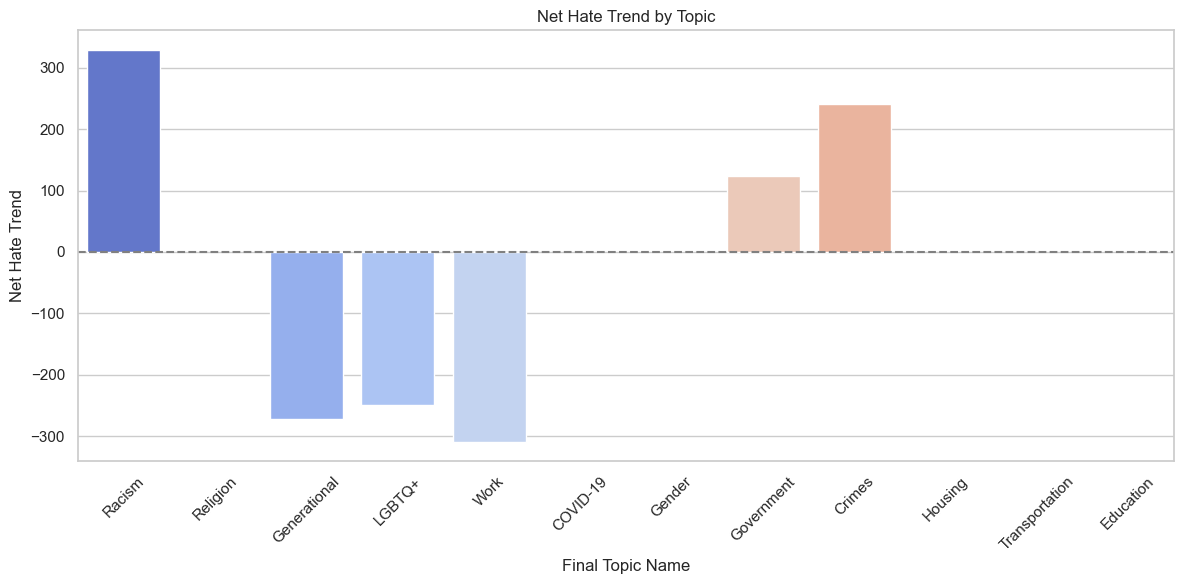

C:\Users\Yi Jing\AppData\Local\Temp\ipykernel_29276\132826971.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_df, x='Final Topic Name', y='Net Toxic Trend', palette='coolwarm')


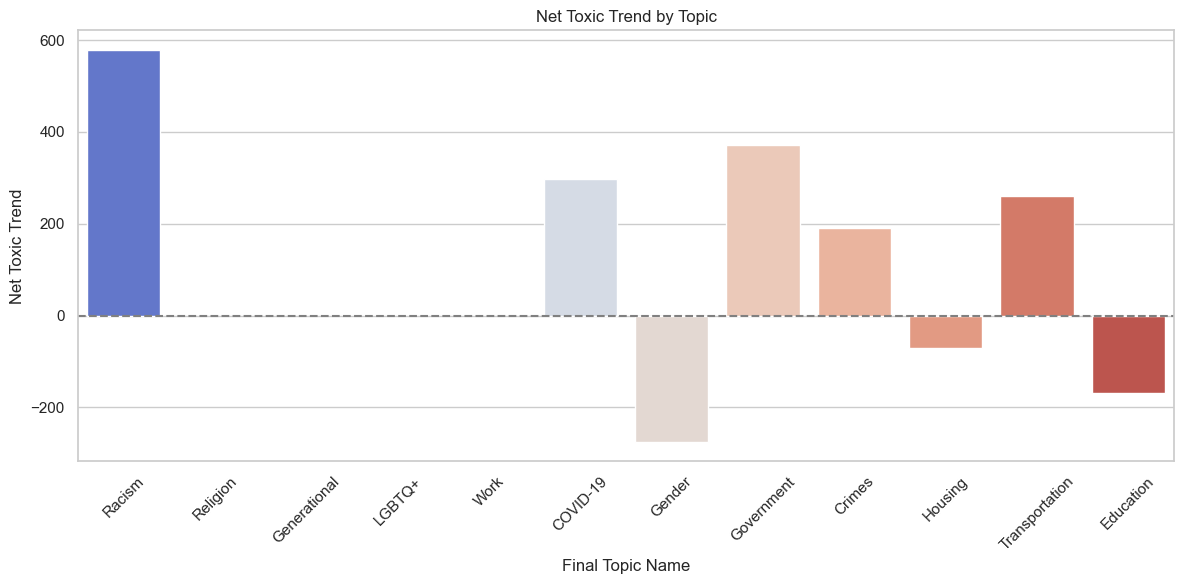

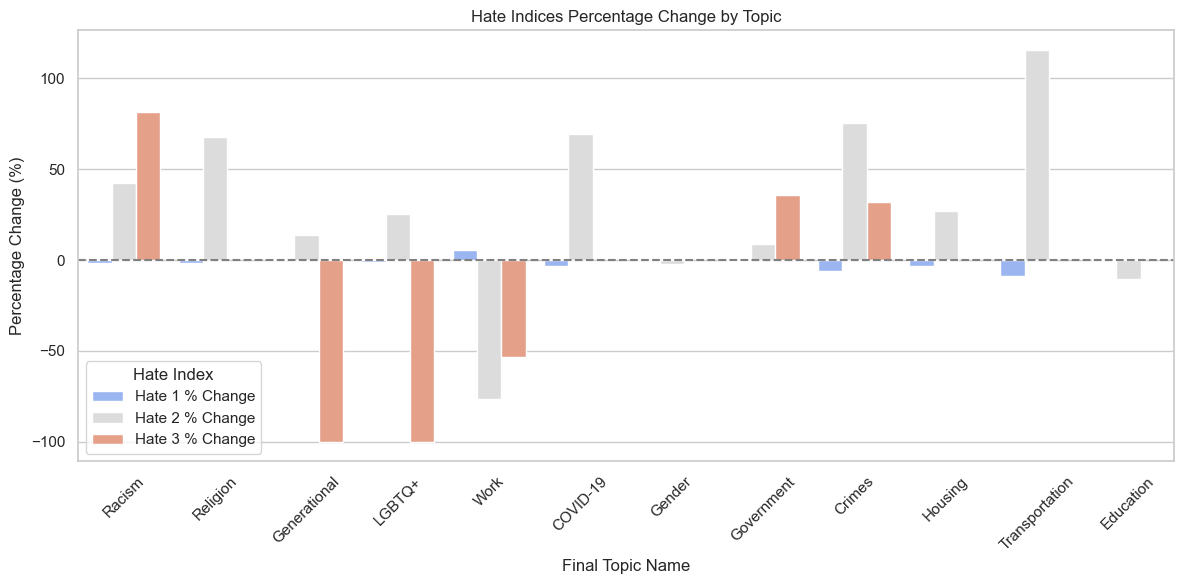

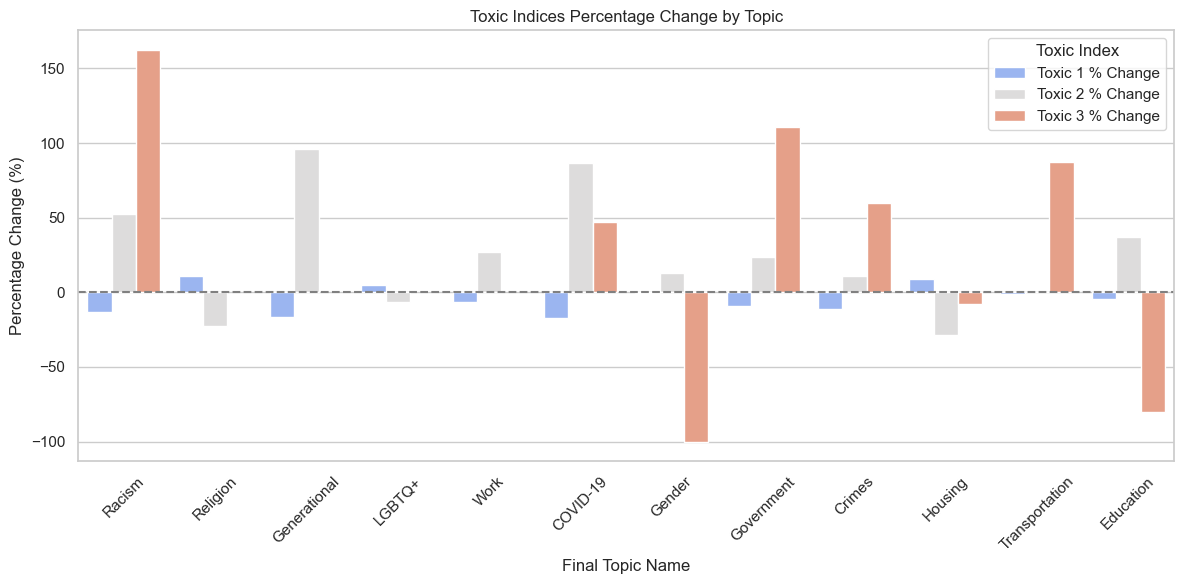

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting Net Hate Trend
plt.figure(figsize=(12, 6))
sns.barplot(data=trend_df, x="Final Topic Name", y="Net Hate Trend", palette="coolwarm")
plt.title("Net Hate Trend by Topic")
plt.xlabel("Final Topic Name")
plt.ylabel("Net Hate Trend")
plt.xticks(rotation=45)
plt.axhline(0, color="grey", linestyle="--")  # Line at y=0 for reference
plt.tight_layout()
plt.show()

# Plotting Net Toxic Trend
plt.figure(figsize=(12, 6))
sns.barplot(
    data=trend_df, x="Final Topic Name", y="Net Toxic Trend", palette="coolwarm"
)
plt.title("Net Toxic Trend by Topic")
plt.xlabel("Final Topic Name")
plt.ylabel("Net Toxic Trend")
plt.xticks(rotation=45)
plt.axhline(0, color="grey", linestyle="--")  # Line at y=0 for reference
plt.tight_layout()
plt.show()

# Plotting Percentage Changes for Hate Indices
plt.figure(figsize=(12, 6))
indices_to_plot_hate = ["Hate 1 % Change", "Hate 2 % Change", "Hate 3 % Change"]
trend_df_melted_hate = trend_df.melt(
    id_vars="Final Topic Name",
    value_vars=indices_to_plot_hate,
    var_name="Hate Index",
    value_name="Percentage Change",
)

sns.barplot(
    data=trend_df_melted_hate,
    x="Final Topic Name",
    y="Percentage Change",
    hue="Hate Index",
    palette="coolwarm",
)
plt.title("Hate Indices Percentage Change by Topic")
plt.xlabel("Final Topic Name")
plt.ylabel("Percentage Change (%)")
plt.xticks(rotation=45)
plt.axhline(0, color="grey", linestyle="--")  # Line at y=0 for reference
plt.tight_layout()
plt.legend(title="Hate Index")
plt.show()

# Plotting Percentage Changes for Toxic Indices
plt.figure(figsize=(12, 6))
indices_to_plot_toxic = ["Toxic 1 % Change", "Toxic 2 % Change", "Toxic 3 % Change"]
trend_df_melted_toxic = trend_df.melt(
    id_vars="Final Topic Name",
    value_vars=indices_to_plot_toxic,
    var_name="Toxic Index",
    value_name="Percentage Change",
)

sns.barplot(
    data=trend_df_melted_toxic,
    x="Final Topic Name",
    y="Percentage Change",
    hue="Toxic Index",
    palette="coolwarm",
)
plt.title("Toxic Indices Percentage Change by Topic")
plt.xlabel("Final Topic Name")
plt.ylabel("Percentage Change (%)")
plt.xticks(rotation=45)
plt.axhline(0, color="grey", linestyle="--")  # Line at y=0 for reference
plt.tight_layout()
plt.legend(title="Toxic Index")
plt.show()

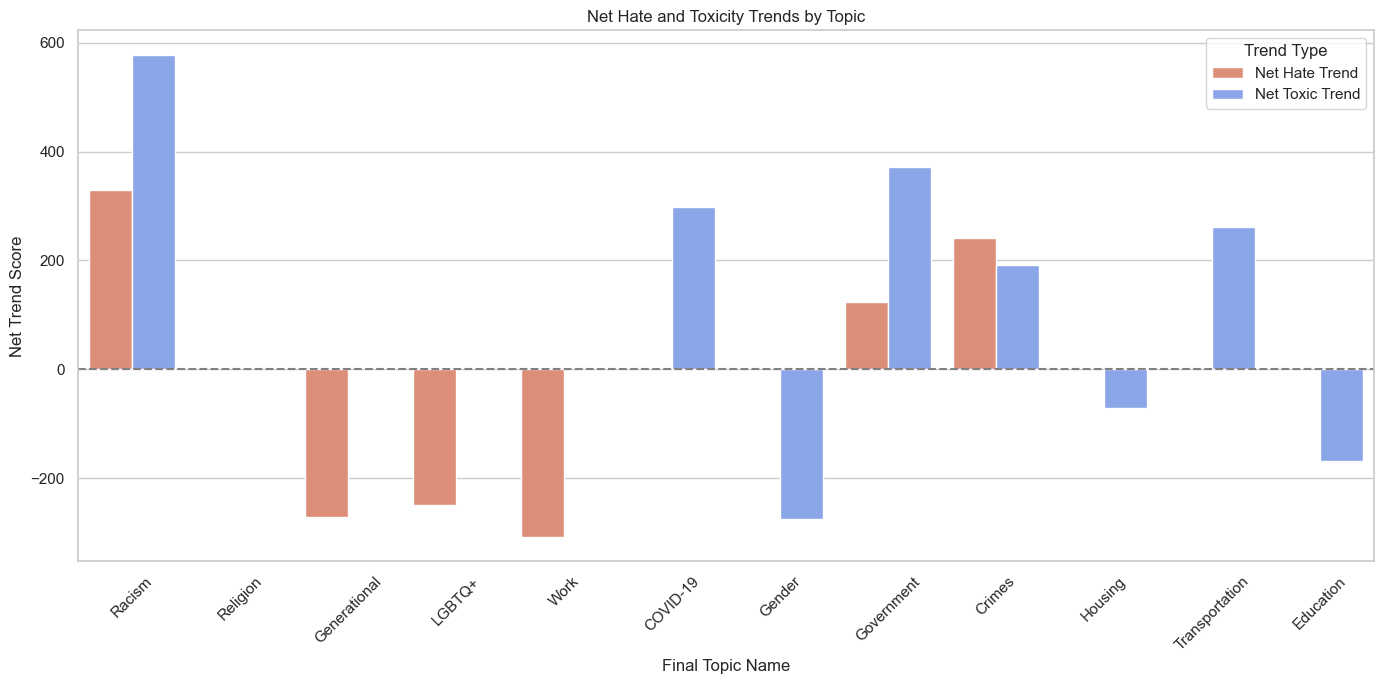

In [ ]:
melted_trend_df = trend_df.melt(
    id_vars="Final Topic Name",
    value_vars=["Net Hate Trend", "Net Toxic Trend"],
    var_name="Trend Type",
    value_name="Net Trend Score",
)

# Define custom coolwarm-like shades for Hate (red tone) and Toxic (blue tone)
palette = {
    "Net Hate Trend": sns.color_palette("coolwarm", as_cmap=True)(0.8),  # red tone
    "Net Toxic Trend": sns.color_palette("coolwarm", as_cmap=True)(0.2),
}  # blue tone

# Set up the plot
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(
    data=melted_trend_df,
    x="Final Topic Name",
    y="Net Trend Score",
    hue="Trend Type",
    palette=palette,
)


plt.title("Net Hate and Toxicity Trends by Topic")
plt.xlabel("Final Topic Name")
plt.ylabel("Net Trend Score")
plt.xticks(rotation=45)
plt.axhline(0, color="grey", linestyle="--")  # Add a reference line at y=0
plt.legend(title="Trend Type")
plt.tight_layout()
plt.show()

In [5]:
df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,year,word_count,Sensitive Group,Classification,clean_text,custom_topic,Topic_Words,Final Topic,Final Topic Name
0,Tell The F Mon G3rs,16/6/20 9:22,revisedchampion,/r/singapore/comments/ha0jfx/better_suggestion...,t3_ha0jfx,t1_fuzu5ag,fuzu66z,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,5.0,No,Toxic 2,tell f mon g3rs,82,"hush, shut, singh, geh, sh, hannah, koh, brah,...",NaN,NaN
1,"Don't ask so many questions, if not PAP arrest...",2023-10-10 07:15:37,RE_TrollzL0rd,/r/singaporehappenings/comments/173vano/privat...,t3_173vano,t1_k45ajnz,k48tp91,t5_70s6ew,"{'banned_at_utc': None, 'mod_reason_by': None,...",2023,20.0,No,Toxic 1,dont ask many questions pap arrest seditious s...,15,"voting, voters, vote, ballot, ballots, votes, ...",8.0,Government
2,It's a claim that is well supported by various...,6/8/2020 11:37,Talkingtomytoilet,/r/singapore/comments/gyxf42/the_myth_of_syste...,t3_gyxf42,t1_ftcyjev,ftczbxh,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,21.0,Yes,Hate 1,claim well supported various studies blm hand ...,-1,"singaporean, singapore, race, countries, cant,...",NaN,NaN
3,Why come all the way here and complain dipshit...,20/2/2022 2:21,viviseca,/r/SingaporeRaw/comments/swdnv3/its_funny_beca...,t3_swdnv3,t1_hxn3238,hxnl9cs,t5_xnx04,"{'controversiality': 0, 'collapsed_reason_code...",2022,33.0,Yes,Hate 2,come way complain dipshit pajeet ape enjoy lif...,-1,"singaporean, singapore, race, countries, cant,...",NaN,NaN
4,I can understand giving exemptions for people ...,2/2/22 9:39,Silverelfz,/r/singapore/comments/siafpw/muslims_unvaccina...,t3_siafpw,t1_hv8hm2o,hv992pf,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code...",2022,31.0,Yes,Hate 1,understand giving exemptions people cannot vac...,13,"vaccinations, vaccines, vaccination, vaccine, ...",6.0,COVID-19


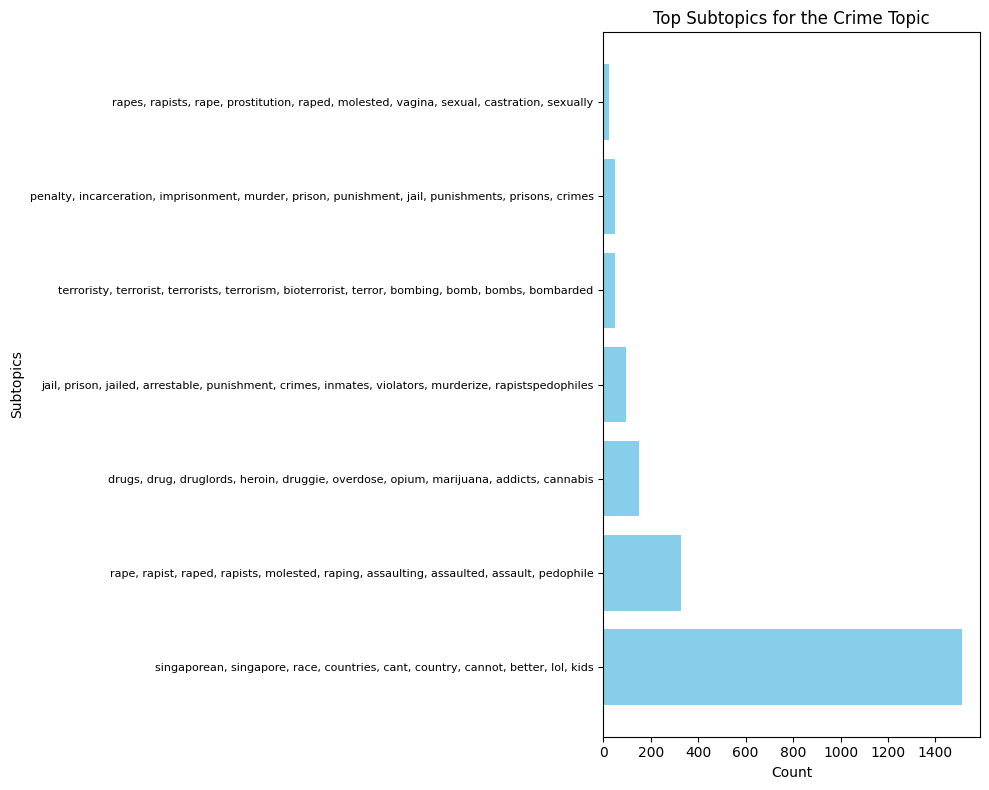

In [16]:
crime_subtopics = df[df["Final Topic Name"] == "Crimes"]["Topic_Words"].value_counts()

# Plotting with topic words on the y-axis
plt.figure(figsize=(10, 8))
plt.barh(crime_subtopics.index, crime_subtopics.values, color="skyblue")
plt.title("Top Subtopics for the Crime Topic")
plt.xlabel("Count")
plt.ylabel("Subtopics")
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

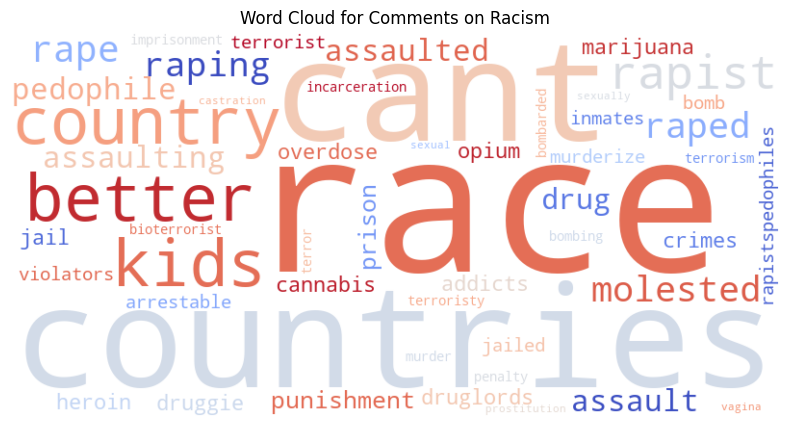

In [20]:
crime_comments = df[df["Final Topic Name"] == "Crimes"]["Topic_Words"]
crime_text = " ".join(comment for comment in crime_comments)

# Create a set of stop words to remove
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(
    [
        "comment",
        "say",
        "singapore",
        "singaporean",
        "people",
        "singaporeans",
        "u",
        "even",
        "will",
        "one",
        "lol",
        "go",
    ]
)  # Add any specific words you want to exclude


# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    collocations=False,
    stopwords=custom_stopwords,
    colormap="coolwarm",
    random_state=475,
).generate(crime_text)

# Plot the Word Cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # No axis for neat visualization
plt.title("Word Cloud for Comments on Racism")
plt.show()